In [2]:
import numpy as np

X = np.array([[0, 1, 0, 1],
              [1, 1, 1, 0],
              [0, 1, 1, 0],
              [0, 0, 0, 1],
              [0, 1, 1, 0],
              [0, 1, 0, 1],
              [1, 0, 0, 1]])
y = np.array([0, 1, 1, 0, 1, 0, 0])

counts = {}
for label in np.unique(y):
    counts[label] = X[y == label].sum(axis = 0)
print("feature counts:\n{}".format(counts))


feature counts:
{0: array([1, 2, 0, 4]), 1: array([1, 3, 3, 0])}


In [3]:
from sklearn.naive_bayes import BernoulliNB

In [4]:
clf = BernoulliNB().fit(X, y)
Next_Day = [[0, 0, 1, 0]]
pre = clf.predict(Next_Day)
if pre == [1]:
    print("打雷了，回家收衣服了！")
else:
    print("没事，今天阳光明媚！")

打雷了，回家收衣服了！


In [5]:
Another_day = [[1, 1, 0, 1]]
pre2 = clf.predict(Another_day)
if pre2 == [1]:
    print("打雷了，回家收衣服了！")
else:
    print("没事，今天阳光明媚！")

没事，今天阳光明媚！


In [6]:
print(clf.predict_proba(Next_Day))#[不下雨的概率， 下雨的概率]

[[ 0.13848881  0.86151119]]


In [7]:
print(clf.predict_proba(Another_day))#[不下雨的概率， 下雨的概率]

[[ 0.92340878  0.07659122]]


# 朴素贝叶斯算法的不同方法

In [8]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
X, y = make_blobs(n_samples=500, centers=5, random_state=8)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=8)
nb = BernoulliNB()
nb.fit(X_train, y_train)
print("模型的分: {:.3f}".format(nb.score(X_test, y_test)))

模型的分: 0.544


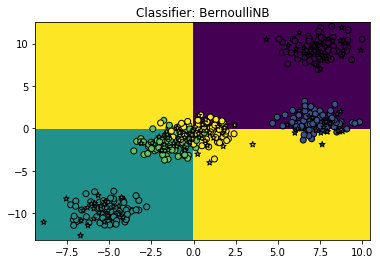

In [9]:
import matplotlib.pyplot as plt
X_min, X_max = X[:,0].min()-0.5, X[:,0].max()+0.5
y_min, y_max = X[:,1].min()-0.5, X[:,1].max()+0.5

xx, yy = np.meshgrid(np.arange(X_min, X_max, .02),
                     np.arange(y_min, y_max, .02))

z = nb.predict(np.c_[(xx.ravel(), yy.ravel())]).reshape(xx.shape)
plt.pcolormesh(xx, yy, z)

plt.scatter(X_train[:,0], X_train[:, 1], c = y_train, edgecolors='k')
plt.scatter(X_test[:,0], X_test[:, 1], c = y_test, marker = '*',edgecolors='k')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.title('Classifier: BernoulliNB')
plt.show()

# 高斯朴素贝叶斯

In [11]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print("模型得分:{:.3f}".format(gnb.score(X_test, y_test)))

模型得分:0.968


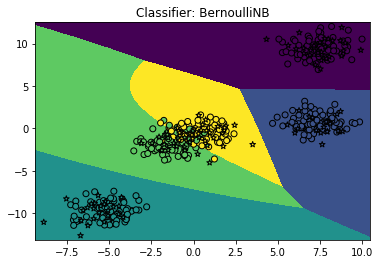

In [12]:
z = gnb.predict(np.c_[(xx.ravel(), yy.ravel())]).reshape(xx.shape)
plt.pcolormesh(xx, yy, z)

plt.scatter(X_train[:,0], X_train[:, 1], c = y_train, edgecolors='k')
plt.scatter(X_test[:,0], X_test[:, 1], c = y_test, marker = '*',edgecolors='k')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.title('Classifier: BernoulliNB')
plt.show()

# 多项式朴素贝叶斯

In [15]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scled = scaler.transform(X_train)
X_test_scled = scaler.transform(X_test)

mnb = MultinomialNB()
mnb.fit(X_train_scled, y_train)
print("模型得分:{:.3f}".format(mnb.score(X_test_scled, y_test)))

模型得分:0.320


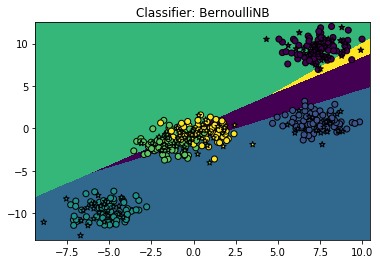

In [16]:
z = mnb.predict(np.c_[(xx.ravel(), yy.ravel())]).reshape(xx.shape)
plt.pcolormesh(xx, yy, z)

plt.scatter(X_train[:,0], X_train[:, 1], c = y_train, edgecolors='k')
plt.scatter(X_test[:,0], X_test[:, 1], c = y_test, marker = '*',edgecolors='k')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.title('Classifier: BernoulliNB')
plt.show()

# 朴素贝叶斯实战----肿瘤

In [19]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(cancer.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [24]:
print("肿瘤的分类:", cancer['target_names'])
print("\n肿瘤的特征:\n", cancer['feature_names'])

肿瘤的分类: ['malignant' 'benign']

肿瘤的特征:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [25]:
X, y = cancer.data, cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=38)
print("训练数据集形态:", X_train.shape)
print("测试数据集形态:", X_test.shape)

训练数据集形态: (426, 30)
测试数据集形态: (143, 30)


In [28]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print("训练集得分:{:.3f}".format(gnb.score(X_train, y_train)))
print("测试机得分:{:.3f}".format(gnb.score(X_test, y_test)))

训练集得分:0.948
测试机得分:0.944


In [31]:
print("模型预测的分类是:{}".format(gnb.predict([X[123]])))
print("样本正确的分类是:",y[123])

模型预测的分类是:[1]
样本正确的分类是: 1


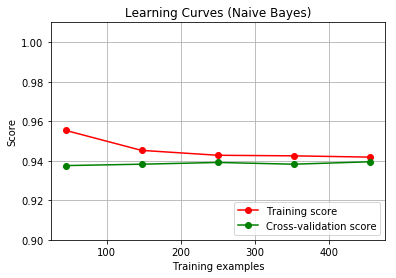

In [47]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

X, y = cancer.data, cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=38)
def plot_learning_curve(estimator, title, X, y, ylim = None, cv = None, n_jobs = 1, train_sizes = np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv = cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    plt.grid()

    plt.plot(train_sizes, train_scores_mean, 'o-', color = "r", label = "Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color = "g", label = "Cross-validation score")

    plt.legend(loc = "lower right")
    return plt

title = "Learning Curves (Naive Bayes)"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = GaussianNB()
plot_learning_curve(estimator, title, X, y, ylim=(0.9, 1.01), cv = cv, n_jobs = 4)
plt.show()